# Introduction to MDAnalysis

---

### Setting Up MDAnalysis

To get started, you can use the provided `environment.yml` file to create a conda environment with all necessary dependencies for this workshop.

For installation details, visit: https://www.mdanalysis.org/pages/installation_quick_start/. Typically, installation is done via **pip** or **conda**.

To install MDAnalysis, use:

`pip install MDAnalysis`

To include the example data used in this notebook, you'll also need MDAnalysisTests:

`pip install MDAnalysisTests`

Additionally, MDAnalysis offers a repository of extensive example data files through MDAnalysisData:

`pip install MDAnalysisData`

Additonally you can find the user guide @ https://userguide.mdanalysis.org/stable/index.html

---


## Lesson 1: Introduction to MDAnalysis
**Author**: Aaryesh Deshpande

**Email**: adeshpande334@gatech.edu

**Description**: This notebook provides an introduction to using MDAnalysis for molecular dynamics analysis. It covers the basic concepts, objectives, and workflow for analyzing MD simulation data.

**MDAnalysis** is a powerful Python library that allows users to analyze molecular dynamics (MD) simulations. It provides tools to read, manipulate, and analyze trajectory and structure files from various MD simulation packages.

#### Key Concepts

- **Universe**: The core data structure in MDAnalysis. It represents the entire system being analyzed, including atoms, residues, and segments.
- **Topology**: Contains the structural information of the molecules, such as atom names, types, and connectivity.
- **Trajectory**: Contains the simulation data over time, including the positions and velocities of atoms.

#### Objectives

In this lesson, we will:
1. Learn how to load and inspect MD simulation data using MDAnalysis.
2. Understand the basic components of a Universe.
3. Perform simple analyses on the loaded data.

By the end of this lesson, you will have a foundational understanding of how to use MDAnalysis for molecular dynamics analysis.

#### Importing basic modules
This cell sets up the environment for data analysis and visualization by importing necessary libraries.

Imports:
- sys: Provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter.
- os: Provides a way of using operating system dependent functionality like reading or writing to the file system.
- numpy (as np): A fundamental package for scientific computing with Python, providing support for arrays, matrices, and many mathematical functions.
- matplotlib.pyplot (as plt): A state-based interface to matplotlib, providing a MATLAB-like way of plotting.
- seaborn (as sns): A Python visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.


In [ ]:
#If these modules are not installed, please install them by running this cell
!python3 -m pip install matplotlib seaborn pandas numpy mdanalysis MDAnalysisTests mdtraj nglview scikit-learn

In [123]:
# Enable interactive plotting with widgets
%matplotlib widget 

# Import necessary modules
import sys, os
import nglview as nv
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import the MDAnalysis library for molecular dynamics analysis
import MDAnalysis as mda
#Warning handler
mda.warnings.showwarning

# Import the MDAnalysis test data that is bundled with the library
from MDAnalysisTests.datafiles import PSF, DCD
from MDAnalysis.tests.datafiles import GRO, TRR
from MDAnalysis.tests.datafiles import PDB_small

# Import specific analysis modules from MDAnalysis
from MDAnalysis.analysis import rms, align, contacts, pca, distances

# Import the distance_array function for calculating distance arrays
from MDAnalysis.analysis.distances import distance_array

# Import the MDAnalysis library for molecular dynamics analysis
from MDAnalysis.lib import distances as mda_distances

# Enable inline plotting
%matplotlib inline

#### Usage of data:
- We can either use the test data that is bundled with MDAnalysis or use our own data for this analysis
- For the first lesson will use the test data and for the second lesson onwards will use the data downloaded from the drive link.abs


## Understanding basic functionalities of MDAnalysis library:
1. Understanding the Universe object structure
2. Parameters of the object
3. Visualizing the objects
4. Selections and selection parameters
5. Bonds, angles, dihedral and positional data

#### Understanding the Object Structure in MDAnalysis

MDAnalysis revolves around two primary classes: the `Universe` and the `AtomGroup`.

<br><center><img src="https://mdauserguide.readthedocs.io/en/latest/_images/classes.png" alt="MDAnalysis Object Structure" style="width: 2000px;"/></center>

- **The `Universe` Class**: This is the core class in MDAnalysis, encapsulating all information about a molecular dynamics system.
  - **Static Information**: Includes details about atoms and their connectivities, collectively known as the topology.
  - **Dynamic Information**: Encompasses the trajectory data, which consists of coordinates and frames over time.

- **Hierarchy of Containers**: The `Universe` class organizes atoms through a structured hierarchy:
  - **Atoms**: The fundamental units, which can be grouped into an `AtomGroup`.
  - **Residues**: Collections of atoms that form residues. These can be further grouped into `ResidueGroups`.
  - **Segments**: Collections of residues that form segments. These can be grouped into `SegmentGroups`.

### Basic workflow for analysis in MDAnalysis
1. Import MDAnalysis and other assited libraries
2. Create a `Universe`
3. Define an `AtomGroup`
4. Collect position data
5. Analyse the data (like rmsd, rmsf..etc)

MDAnalysis accepts the PSF, PDB, CRD, and GRO formats for topology files and DCD, XTC, TRR, and XYZ formats for trajectory files
for more details on the formats please refer https://userguide.mdanalysis.org/stable/formats/format_reference.html

In [124]:
## Using the MDAnalysis test data that is bundled with the library
"""
This cell demonstrates how to load PSF and DCD files using MDAnalysis.
MDAnalysis is a Python library that provides tools to analyze molecular dynamics (MD) simulations. 
It allows users to read trajectory files and perform various analyses on the molecular structures.
Attributes:
    PSF (str): Path to the PSF (Protein Structure File) file.
    DCD (str): Path to the DCD (Dynamics Coordinate Data) file.
Usage:
    The script uses the MDAnalysis library to create a Universe object, which is a central data structure 
    in MDAnalysis. The Universe object holds information about the molecular system, including atom 
    positions, topology, and trajectory data.
    Example:
    Here, `u` is the Universe object that contains the loaded molecular system data.
"""
# Load the PSF and DCD files

# Usage: mda.Universe('path/to/topology', 'path/to/trajectory')
# In this case, we are using the topology file type - PSF and trajectory file type - DCD files that are bundled with MDAnalysis
# MDAnalysis accepts the PSF, PDB, CRD, and GRO formats for topology files and DCD, XTC, TRR, and XYZ formats for trajectory files

# Create a Universe object to hold the molecular system data
u = mda.Universe(PSF, DCD)

# Print the Universe object to see the details of the loaded system
u

C:\Users\aarye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\MDAnalysis\coordinates\DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


<Universe with 3341 atoms>

#### Key properties of a `Universe`:
- `atoms`: an `AtomGroup` containing all of the system's atoms
    - similarly, `segments` and `residues`; a `SegmentGroup` and a `ResidueGroup`, respectively
    
- Various bond and angle information, as `TopologyGroups`: `bonds`, `angles`, `dihedrals`, `impropers` (if found in the topology file)

- `trajectory` (section 2): accessing time-dependent data structures

#### An `AtomGroup` is an "array" of atoms.

We can get various properties of each atom contained in an `AtomGroup` through attribues, e.g.:

   - `names`
   - `resnames`
   - `resids` 
   - `charges`
   - `masses`

Exactly which properties you can get depend on what is read from the topology (see the [documentation](https://userguide.mdanalysis.org/stable/formats/index.html#formats))

In [125]:
# Print the number of atoms, residues, and segments in the Universe object
print(u)
print(len(u.atoms))
print(u.residues)
print(len(u.residues))
print(u.segments)
print(len(u.segments))

<Universe with 3341 atoms>
3341
<ResidueGroup [<Residue MET, 1>, <Residue ARG, 2>, <Residue ILE, 3>, ..., <Residue ILE, 212>, <Residue LEU, 213>, <Residue GLY, 214>]>
214
<SegmentGroup [<Segment 4AKE>]>
1


In [6]:
# Print the bond and angle information in the Universe object
print(u.bonds)
print(u.angles)
print(u.trajectory)

<TopologyGroup containing 3365 bonds>
<TopologyGroup containing 6123 angles>
<DCDReader C:/Users/aarye/AppData/Local/Packages/PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0/LocalCache/local-packages/Python311/site-packages/MDAnalysisTests/data/adk_dims.dcd with 98 frames of 3341 atoms>


In [53]:
# Print the trajectory information in the Universe object
print("Indices:", u.atoms.indices)
print("Names:", u.atoms.names)
print("Residue Names:", u.atoms.resnames)
print("Residue IDs:", u.atoms.resids)
print("Charges:", u.atoms.charges)
print("Masses:", u.atoms.masses)
print("Types:", u.atoms.types)

Indices: [   0    1    2 ... 3338 3339 3340]
Names: ['N' 'HT1' 'HT2' ... 'C' 'OT1' 'OT2']
Residue Names: ['MET' 'MET' 'MET' ... 'GLY' 'GLY' 'GLY']
Residue IDs: [  1   1   1 ... 214 214 214]
Charges: [-0.30000001  0.33000001  0.33000001 ...  0.34       -0.67000002
 -0.67000002]
Masses: [14.007  1.008  1.008 ... 12.011 15.999 15.999]
Types: ['56' '2' '2' ... '32' '72' '72']


In [7]:
# Printing the names of the atoms
print(u.atoms.names)

# or
at = u.atoms
print(at.names)

['N' 'HT1' 'HT2' ... 'C' 'OT1' 'OT2']
['N' 'HT1' 'HT2' ... 'C' 'OT1' 'OT2']


In [8]:
# Printing the names of the residues
print(u.residues.names)

# or
at = u.residues
print(at.names)

[array(['N', 'HT1', 'HT2', 'HT3', 'CA', 'HA', 'CB', 'HB1', 'HB2', 'CG',
       'HG1', 'HG2', 'SD', 'CE', 'HE1', 'HE2', 'HE3', 'C', 'O'],
      dtype=object), array(['N', 'HN', 'CA', 'HA', 'CB', 'HB1', 'HB2', 'CG', 'HG1', 'HG2',
       'CD', 'HD1', 'HD2', 'NE', 'HE', 'CZ', 'NH1', 'HH11', 'HH12', 'NH2',
       'HH21', 'HH22', 'C', 'O'], dtype=object), array(['N', 'HN', 'CA', 'HA', 'CB', 'HB', 'CG2', 'HG21', 'HG22', 'HG23',
       'CG1', 'HG11', 'HG12', 'CD', 'HD1', 'HD2', 'HD3', 'C', 'O'],
      dtype=object), array(['N', 'HN', 'CA', 'HA', 'CB', 'HB', 'CG2', 'HG21', 'HG22', 'HG23',
       'CG1', 'HG11', 'HG12', 'CD', 'HD1', 'HD2', 'HD3', 'C', 'O'],
      dtype=object), array(['N', 'HN', 'CA', 'HA', 'CB', 'HB1', 'HB2', 'CG', 'HG', 'CD1',
       'HD11', 'HD12', 'HD13', 'CD2', 'HD21', 'HD22', 'HD23', 'C', 'O'],
      dtype=object), array(['N', 'HN', 'CA', 'HA', 'CB', 'HB1', 'HB2', 'CG', 'HG', 'CD1',
       'HD11', 'HD12', 'HD13', 'CD2', 'HD21', 'HD22', 'HD23', 'C', 'O'],
      dtype=object)

In [9]:
# Printing the names of the segments
print(u.segments.names)

# or
at = u.segments
print(at.names)

[array(['N', 'HT1', 'HT2', ..., 'C', 'OT1', 'OT2'], dtype=object)]
[array(['N', 'HT1', 'HT2', ..., 'C', 'OT1', 'OT2'], dtype=object)]


In [ ]:
# Printing the number of atoms, residues, segments, bonds and angles
print(len(u.atoms))
print(len(u.residues))
print(len(u.segments))
print(len(u.bonds))
print(len(u.angles))

3341
214
1


In [12]:
# Printing the residue ids
print(u.residues.resids)

# or
print("\n")
at = u.residues
print(at.resids)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214]


[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32

In [ ]:
# Printing the residue names
print(u.residues.resnames)

['MET' 'ARG' 'ILE' 'ILE' 'LEU' 'LEU' 'GLY' 'ALA' 'PRO' 'GLY' 'ALA' 'GLY'
 'LYS' 'GLY' 'THR' 'GLN' 'ALA' 'GLN' 'PHE' 'ILE' 'MET' 'GLU' 'LYS' 'TYR'
 'GLY' 'ILE' 'PRO' 'GLN' 'ILE' 'SER' 'THR' 'GLY' 'ASP' 'MET' 'LEU' 'ARG'
 'ALA' 'ALA' 'VAL' 'LYS' 'SER' 'GLY' 'SER' 'GLU' 'LEU' 'GLY' 'LYS' 'GLN'
 'ALA' 'LYS' 'ASP' 'ILE' 'MET' 'ASP' 'ALA' 'GLY' 'LYS' 'LEU' 'VAL' 'THR'
 'ASP' 'GLU' 'LEU' 'VAL' 'ILE' 'ALA' 'LEU' 'VAL' 'LYS' 'GLU' 'ARG' 'ILE'
 'ALA' 'GLN' 'GLU' 'ASP' 'CYS' 'ARG' 'ASN' 'GLY' 'PHE' 'LEU' 'LEU' 'ASP'
 'GLY' 'PHE' 'PRO' 'ARG' 'THR' 'ILE' 'PRO' 'GLN' 'ALA' 'ASP' 'ALA' 'MET'
 'LYS' 'GLU' 'ALA' 'GLY' 'ILE' 'ASN' 'VAL' 'ASP' 'TYR' 'VAL' 'LEU' 'GLU'
 'PHE' 'ASP' 'VAL' 'PRO' 'ASP' 'GLU' 'LEU' 'ILE' 'VAL' 'ASP' 'ARG' 'ILE'
 'VAL' 'GLY' 'ARG' 'ARG' 'VAL' 'HSD' 'ALA' 'PRO' 'SER' 'GLY' 'ARG' 'VAL'
 'TYR' 'HSD' 'VAL' 'LYS' 'PHE' 'ASN' 'PRO' 'PRO' 'LYS' 'VAL' 'GLU' 'GLY'
 'LYS' 'ASP' 'ASP' 'VAL' 'THR' 'GLY' 'GLU' 'GLU' 'LEU' 'THR' 'THR' 'ARG'
 'LYS' 'ASP' 'ASP' 'GLN' 'GLU' 'GLU' 'THR' 'VAL' 'A

In [14]:
# Priting the residue ids and names
for res in u.residues:
    print(res.resid, res.resname)


1 MET
2 ARG
3 ILE
4 ILE
5 LEU
6 LEU
7 GLY
8 ALA
9 PRO
10 GLY
11 ALA
12 GLY
13 LYS
14 GLY
15 THR
16 GLN
17 ALA
18 GLN
19 PHE
20 ILE
21 MET
22 GLU
23 LYS
24 TYR
25 GLY
26 ILE
27 PRO
28 GLN
29 ILE
30 SER
31 THR
32 GLY
33 ASP
34 MET
35 LEU
36 ARG
37 ALA
38 ALA
39 VAL
40 LYS
41 SER
42 GLY
43 SER
44 GLU
45 LEU
46 GLY
47 LYS
48 GLN
49 ALA
50 LYS
51 ASP
52 ILE
53 MET
54 ASP
55 ALA
56 GLY
57 LYS
58 LEU
59 VAL
60 THR
61 ASP
62 GLU
63 LEU
64 VAL
65 ILE
66 ALA
67 LEU
68 VAL
69 LYS
70 GLU
71 ARG
72 ILE
73 ALA
74 GLN
75 GLU
76 ASP
77 CYS
78 ARG
79 ASN
80 GLY
81 PHE
82 LEU
83 LEU
84 ASP
85 GLY
86 PHE
87 PRO
88 ARG
89 THR
90 ILE
91 PRO
92 GLN
93 ALA
94 ASP
95 ALA
96 MET
97 LYS
98 GLU
99 ALA
100 GLY
101 ILE
102 ASN
103 VAL
104 ASP
105 TYR
106 VAL
107 LEU
108 GLU
109 PHE
110 ASP
111 VAL
112 PRO
113 ASP
114 GLU
115 LEU
116 ILE
117 VAL
118 ASP
119 ARG
120 ILE
121 VAL
122 GLY
123 ARG
124 ARG
125 VAL
126 HSD
127 ALA
128 PRO
129 SER
130 GLY
131 ARG
132 VAL
133 TYR
134 HSD
135 VAL
136 LYS
137 PHE
138 ASN
139 

In [15]:
# Printing the number of atoms in each residue
for res in u.residues:
    print(res.resname, len(res.atoms))

MET 19
ARG 24
ILE 19
ILE 19
LEU 19
LEU 19
GLY 7
ALA 10
PRO 14
GLY 7
ALA 10
GLY 7
LYS 22
GLY 7
THR 14
GLN 17
ALA 10
GLN 17
PHE 20
ILE 19
MET 17
GLU 15
LYS 22
TYR 21
GLY 7
ILE 19
PRO 14
GLN 17
ILE 19
SER 11
THR 14
GLY 7
ASP 12
MET 17
LEU 19
ARG 24
ALA 10
ALA 10
VAL 16
LYS 22
SER 11
GLY 7
SER 11
GLU 15
LEU 19
GLY 7
LYS 22
GLN 17
ALA 10
LYS 22
ASP 12
ILE 19
MET 17
ASP 12
ALA 10
GLY 7
LYS 22
LEU 19
VAL 16
THR 14
ASP 12
GLU 15
LEU 19
VAL 16
ILE 19
ALA 10
LEU 19
VAL 16
LYS 22
GLU 15
ARG 24
ILE 19
ALA 10
GLN 17
GLU 15
ASP 12
CYS 11
ARG 24
ASN 14
GLY 7
PHE 20
LEU 19
LEU 19
ASP 12
GLY 7
PHE 20
PRO 14
ARG 24
THR 14
ILE 19
PRO 14
GLN 17
ALA 10
ASP 12
ALA 10
MET 17
LYS 22
GLU 15
ALA 10
GLY 7
ILE 19
ASN 14
VAL 16
ASP 12
TYR 21
VAL 16
LEU 19
GLU 15
PHE 20
ASP 12
VAL 16
PRO 14
ASP 12
GLU 15
LEU 19
ILE 19
VAL 16
ASP 12
ARG 24
ILE 19
VAL 16
GLY 7
ARG 24
ARG 24
VAL 16
HSD 17
ALA 10
PRO 14
SER 11
GLY 7
ARG 24
VAL 16
TYR 21
HSD 17
VAL 16
LYS 22
PHE 20
ASN 14
PRO 14
PRO 14
LYS 22
VAL 16
GLU 15
GLY 7
LYS 22


In [25]:
# Residue charges
print(u.residues.charges)

# Atom charges
print("\n")
print(u.atoms.charges)

# Segment charges
print("\n")
print(u.segments.charges)

[ 1.00000004e+00  1.00000002e+00  7.45058060e-09  7.45058060e-09
  7.45058060e-09  7.45058060e-09  1.11758709e-08  7.45058060e-09
  1.86264515e-08  1.11758709e-08  7.45058060e-09  1.11758709e-08
  1.00000003e+00  1.11758709e-08 -7.45058060e-09  7.45058060e-09
  7.45058060e-09  7.45058060e-09  7.45058060e-09  7.45058060e-09
  2.23517418e-08 -9.99999963e-01  1.00000003e+00 -7.45058060e-09
  1.11758709e-08  7.45058060e-09  1.86264515e-08  7.45058060e-09
  7.45058060e-09 -3.72529030e-09 -7.45058060e-09  1.11758709e-08
 -9.99999963e-01  2.23517418e-08  7.45058060e-09  1.00000002e+00
  7.45058060e-09  7.45058060e-09  7.45058060e-09  1.00000003e+00
 -3.72529030e-09  1.11758709e-08 -3.72529030e-09 -9.99999963e-01
  7.45058060e-09  1.11758709e-08  1.00000003e+00  7.45058060e-09
  7.45058060e-09  1.00000003e+00 -9.99999963e-01  7.45058060e-09
  2.23517418e-08 -9.99999963e-01  7.45058060e-09  1.11758709e-08
  1.00000003e+00  7.45058060e-09  7.45058060e-09 -7.45058060e-09
 -9.99999963e-01 -9.99999

In [20]:
# Printing the charge of each atom
for atom in u.atoms:
    print(atom.name, atom.charge)

N -0.30000001192092896
HT1 0.33000001311302185
HT2 0.33000001311302185
HT3 0.33000001311302185
CA 0.20999999344348907
HA 0.10000000149011612
CB -0.18000000715255737
HB1 0.09000000357627869
HB2 0.09000000357627869
CG -0.14000000059604645
HG1 0.09000000357627869
HG2 0.09000000357627869
SD -0.09000000357627869
CE -0.2199999988079071
HE1 0.09000000357627869
HE2 0.09000000357627869
HE3 0.09000000357627869
C 0.5099999904632568
O -0.5099999904632568
N -0.4699999988079071
HN 0.3100000023841858
CA 0.07000000029802322
HA 0.09000000357627869
CB -0.18000000715255737
HB1 0.09000000357627869
HB2 0.09000000357627869
CG -0.18000000715255737
HG1 0.09000000357627869
HG2 0.09000000357627869
CD 0.20000000298023224
HD1 0.09000000357627869
HD2 0.09000000357627869
NE -0.699999988079071
HE 0.4399999976158142
CZ 0.6399999856948853
NH1 -0.800000011920929
HH11 0.46000000834465027
HH12 0.46000000834465027
NH2 -0.800000011920929
HH21 0.46000000834465027
HH22 0.46000000834465027
C 0.5099999904632568
O -0.5099999904

In [21]:
# Printing the charge of each residue
for res in u.residues:
    print(res.resname, res.atoms.charges.sum())

MET 1.000000037252903
ARG 1.0000000223517418
ILE 7.450580596923828e-09
ILE 7.450580596923828e-09
LEU 7.450580596923828e-09
LEU 7.450580596923828e-09
GLY 1.1175870895385742e-08
ALA 7.450580596923828e-09
PRO 1.862645149230957e-08
GLY 1.1175870895385742e-08
ALA 7.450580596923828e-09
GLY 1.1175870895385742e-08
LYS 1.0000000298023224
GLY 1.1175870895385742e-08
THR -7.450580596923828e-09
GLN 7.450580596923828e-09
ALA 7.450580596923828e-09
GLN 7.450580596923828e-09
PHE 7.450580596923828e-09
ILE 7.450580596923828e-09
MET 2.2351741790771484e-08
GLU -0.999999962747097
LYS 1.0000000298023224
TYR -7.450580596923828e-09
GLY 1.1175870895385742e-08
ILE 7.450580596923828e-09
PRO 1.862645149230957e-08
GLN 7.450580596923828e-09
ILE 7.450580596923828e-09
SER -3.725290298461914e-09
THR -7.450580596923828e-09
GLY 1.1175870895385742e-08
ASP -0.999999962747097
MET 2.2351741790771484e-08
LEU 7.450580596923828e-09
ARG 1.0000000223517418
ALA 7.450580596923828e-09
ALA 7.450580596923828e-09
VAL 7.450580596923828e

In [24]:
# Printing the charge of each segment
for seg in u.segments:
    print(seg.segid, seg.atoms.charges.sum())

4AKE -3.9999968633055687


In [27]:
# Residue mass
print(u.residues.masses)

# Atom mass
print("\n")
print(u.atoms.masses)

# Segment mass
print("\n")
print(u.segments.masses)

[133.209 157.197 113.16  113.16  113.16  113.16   57.052  71.079  97.117
  57.052  71.079  57.052 129.183  57.052 101.105 128.131  71.079 128.131
 147.177 113.16  131.193 128.107 129.183 163.176  57.052 113.16   97.117
 128.131 113.16   87.078 101.105  57.052 114.08  131.193 113.16  157.197
  71.079  71.079  99.133 129.183  87.078  57.052  87.078 128.107 113.16
  57.052 129.183 128.131  71.079 129.183 114.08  113.16  131.193 114.08
  71.079  57.052 129.183 113.16   99.133 101.105 114.08  128.107 113.16
  99.133 113.16   71.079 113.16   99.133 129.183 128.107 157.197 113.16
  71.079 128.131 128.107 114.08  103.139 157.197 114.104  57.052 147.177
 113.16  113.16  114.08   57.052 147.177  97.117 157.197 101.105 113.16
  97.117 128.131  71.079 114.08   71.079 131.193 129.183 128.107  71.079
  57.052 113.16  114.104  99.133 114.08  163.176  99.133 113.16  128.107
 147.177 114.08   99.133  97.117 114.08  128.107 113.16  113.16   99.133
 114.08  157.197 113.16   99.133  57.052 157.197 157.197

In [26]:
# Printing mass of each atom
for atom in u.atoms:
    print(atom.name, atom.mass)

N 14.007
HT1 1.008
HT2 1.008
HT3 1.008
CA 12.011
HA 1.008
CB 12.011
HB1 1.008
HB2 1.008
CG 12.011
HG1 1.008
HG2 1.008
SD 32.06
CE 12.011
HE1 1.008
HE2 1.008
HE3 1.008
C 12.011
O 15.999
N 14.007
HN 1.008
CA 12.011
HA 1.008
CB 12.011
HB1 1.008
HB2 1.008
CG 12.011
HG1 1.008
HG2 1.008
CD 12.011
HD1 1.008
HD2 1.008
NE 14.007
HE 1.008
CZ 12.011
NH1 14.007
HH11 1.008
HH12 1.008
NH2 14.007
HH21 1.008
HH22 1.008
C 12.011
O 15.999
N 14.007
HN 1.008
CA 12.011
HA 1.008
CB 12.011
HB 1.008
CG2 12.011
HG21 1.008
HG22 1.008
HG23 1.008
CG1 12.011
HG11 1.008
HG12 1.008
CD 12.011
HD1 1.008
HD2 1.008
HD3 1.008
C 12.011
O 15.999
N 14.007
HN 1.008
CA 12.011
HA 1.008
CB 12.011
HB 1.008
CG2 12.011
HG21 1.008
HG22 1.008
HG23 1.008
CG1 12.011
HG11 1.008
HG12 1.008
CD 12.011
HD1 1.008
HD2 1.008
HD3 1.008
C 12.011
O 15.999
N 14.007
HN 1.008
CA 12.011
HA 1.008
CB 12.011
HB1 1.008
HB2 1.008
CG 12.011
HG 1.008
CD1 12.011
HD11 1.008
HD12 1.008
HD13 1.008
CD2 12.011
HD21 1.008
HD22 1.008
HD23 1.008
C 12.011
O 15.999
N

In [28]:
# Printing mass of each residue
for res in u.residues:
    print(res.resname, res.atoms.masses.sum())


MET 133.209
ARG 157.197
ILE 113.15999999999998
ILE 113.15999999999998
LEU 113.15999999999998
LEU 113.15999999999998
GLY 57.052
ALA 71.079
PRO 97.11699999999998
GLY 57.052
ALA 71.079
GLY 57.052
LYS 129.183
GLY 57.052
THR 101.10499999999998
GLN 128.131
ALA 71.079
GLN 128.131
PHE 147.177
ILE 113.15999999999998
MET 131.19299999999998
GLU 128.107
LYS 129.183
TYR 163.176
GLY 57.052
ILE 113.15999999999998
PRO 97.11699999999998
GLN 128.131
ILE 113.15999999999998
SER 87.078
THR 101.10499999999998
GLY 57.052
ASP 114.07999999999998
MET 131.19299999999998
LEU 113.15999999999998
ARG 157.197
ALA 71.079
ALA 71.079
VAL 99.13299999999998
LYS 129.183
SER 87.078
GLY 57.052
SER 87.078
GLU 128.107
LEU 113.15999999999998
GLY 57.052
LYS 129.183
GLN 128.131
ALA 71.079
LYS 129.183
ASP 114.07999999999998
ILE 113.15999999999998
MET 131.19299999999998
ASP 114.07999999999998
ALA 71.079
GLY 57.052
LYS 129.183
LEU 113.15999999999998
VAL 99.13299999999998
THR 101.10499999999998
ASP 114.07999999999998
GLU 128.107
LEU 

In [29]:
# Printing mass of each segment
for seg in u.segments:
    print(seg.segid, seg.atoms.masses.sum())

4AKE 23582.042999999998


In [ ]:
# Visualizing the trajectory
# The trajectory can be visualized using the nglview module in Jupyter notebooks.
view = nv.show_mdanalysis(u)
view

NGLWidget(max_frame=97)

In [ ]:
# Select the protein atoms
prot = u.select_atoms('protein')

# Calculate and print the center of charge
center_of_charge = prot.center_of_charge()
print(f"Center of Charge: {center_of_charge}")

# Calculate and print the center of mass
center_of_mass = prot.center_of_mass()
print(f"Center of Mass: {center_of_mass}")

# Calculate and print the center of geometry
center_of_geometry = prot.center_of_geometry()
print(f"Center of Geometry: {center_of_geometry}")

# Calculate and print the total charge
total_charge = prot.total_charge()
print(f"Total Charge: {total_charge}")

# Calculate and print the total mass
total_mass = prot.total_mass()
print(f"Total Mass: {total_mass}")

# Calculate and print the radius of gyration
radius_of_gyration = prot.radius_of_gyration()
print(f"Radius of Gyration: {radius_of_gyration}")

# Calculate and print the bounding sphere
bsphere = prot.bsphere()
print(f"Bounding Sphere: {bsphere}")

Center of Charge: [-0.31439022 -0.07616303 -0.21308892]
Center of Mass: [-0.01094035  0.05727601 -0.12885778]
Center of Geometry: [-0.04223882  0.01418196 -0.03504874]
Total Charge: -3.9999968633055687
Total Mass: 23582.042999999998
Radius of Gyration: 16.669018368649777
Bounding Sphere: (27.51610056507962, array([-0.04223882,  0.01418196, -0.03504874]))


### Atom Selections:
AtomGroups can be created by indexing `atoms`.

##### Selection Strings and `select_atoms`

The `select_atoms()` method of an `AtomGroup` or `Universe` allows you to create an `AtomGroup` based on a selection string. This method is highly versatile and supports a wide range of selection criteria. For more details, refer to the [User Guide](https://userguide.mdanalysis.org/stable/selections.html).

##### Common Selection Criteria:

- **Attribute-Based Selection**: Select atoms based on attributes such as residue name (`resname`), atom name (`name`), or segment ID (`segid`). For example, you can select all protein atoms using the preset `protein`.
- **Wildcard Matching**: Use wildcards (`*`) to match patterns in atom or residue names.
- **Boolean Operators**: Combine multiple selection criteria using logical operators like `and`, `or`, and `not`.
- **Geometric Selections**: Select atoms based on their spatial relationships, such as atoms within a certain distance (`around`) or within a spherical zone (`sphzone`).


In [33]:
# Selecting atoms using indices
# The atoms can be selected using their indices in the Universe object.
# Here, we select the first 10 atoms in the Universe object.
atoms = u.atoms[:10]
print(atoms.names)

['N' 'HT1' 'HT2' 'HT3' 'CA' 'HA' 'CB' 'HB1' 'HB2' 'CG']


In [34]:
# Visualizing the selected atoms
view_sel_atm = nv.show_mdanalysis(atoms)
view_sel_atm

NGLWidget(max_frame=97)

In [37]:
# Selecting atoms using a selection string
# The atoms can also be selected using a selection string.
# Here, we select the protein atoms using the 'protein' keyword.
# The 'protein' keyword is a selection keyword that selects all protein atoms in the Universe object.
protein_atoms = u.select_atoms('protein')
print(protein_atoms.names)
# Visualizing the protein atoms
view_protein = nv.show_mdanalysis(protein_atoms)
view_protein

['N' 'HT1' 'HT2' ... 'C' 'OT1' 'OT2']


NGLWidget(max_frame=97)

In [38]:
# Selecting atoms using a selection string
# The atoms can be selected using a selection string.
# Here, we select the backbone atoms using the 'backbone' keyword.
# The 'backbone' keyword is a selection keyword that selects all backbone atoms in the Universe object.
backbone_atoms = u.select_atoms('backbone')
print(backbone_atoms.names)

# Visualizing the backbone atoms
view_backbone = nv.show_mdanalysis(backbone_atoms)
view_backbone

['N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N'
 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA'
 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C'
 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O'
 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N'
 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA'
 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C'
 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O'
 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N'
 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA'
 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C'
 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O'
 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N'
 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 'N' 'CA' 'C' 'O' 

NGLWidget(max_frame=97)

In [68]:
# Select Atoms by Residue Name
glycine_atoms = u.select_atoms('resname GLY')
print("Glycine Atoms Names:", glycine_atoms.names)
print("\n")

# Select Atoms by Residue ID
residue_1_atoms = u.select_atoms('resid 1')
print("Residue 1 Atoms Names:", residue_1_atoms.names)
print("\n")

# Select Atoms Within 5 Ångströms of a Specific Atom
nearby_atoms = u.select_atoms('around 5 name CA')
print("Nearby Atoms Names:", nearby_atoms.names)
print("\n")

# Select Atoms Using Wildcards
carbon_atoms = u.select_atoms('name C*')
print("Carbon Atoms Names:", carbon_atoms.names)
print("\n")

# Combine Selections with Boolean Operators
specific_atoms = u.select_atoms('resname GLY and name CA')
print("Specific Atoms Residue IDs:", specific_atoms.resids)
print("\n")

# `AtomGroup`s can also be combined using `&` for "and" and `|` for "or":
specific_atoms = u.select_atoms('resname ASP') & u.select_atoms('name OD1')
print("Specific Atoms Residue IDs (ASP and OD1):", specific_atoms.resids)
print("\n")

# We can also concatenate atomgroups with `+` and subtract with `-`; the following two selections are also identical: 
no_H1 = u.atoms.select_atoms('resname LYS ARG and not name H*')
no_H2 = u.atoms.select_atoms('resname LYS ARG') - u.atoms.select_atoms('name H*')
print("No Hydrogen Atoms (Selection 1 == Selection 2):", no_H1 == no_H2)
print("\n")

# Selecting atoms using a numpy array
# The atoms can also be selected using a numpy array of atom indices.
# Here, we create a numpy array of atom indices and select the corresponding atoms.
atom_indices = np.array([0, 1, 2, 3, 4])
selected_atoms = u.atoms[atom_indices]
print("Selected Atoms Names:", selected_atoms.names)

Glycine Atoms Names: ['N' 'HN' 'CA' 'HA1' 'HA2' 'C' 'O' 'N' 'HN' 'CA' 'HA1' 'HA2' 'C' 'O' 'N'
 'HN' 'CA' 'HA1' 'HA2' 'C' 'O' 'N' 'HN' 'CA' 'HA1' 'HA2' 'C' 'O' 'N' 'HN'
 'CA' 'HA1' 'HA2' 'C' 'O' 'N' 'HN' 'CA' 'HA1' 'HA2' 'C' 'O' 'N' 'HN' 'CA'
 'HA1' 'HA2' 'C' 'O' 'N' 'HN' 'CA' 'HA1' 'HA2' 'C' 'O' 'N' 'HN' 'CA' 'HA1'
 'HA2' 'C' 'O' 'N' 'HN' 'CA' 'HA1' 'HA2' 'C' 'O' 'N' 'HN' 'CA' 'HA1' 'HA2'
 'C' 'O' 'N' 'HN' 'CA' 'HA1' 'HA2' 'C' 'O' 'N' 'HN' 'CA' 'HA1' 'HA2' 'C'
 'O' 'N' 'HN' 'CA' 'HA1' 'HA2' 'C' 'O' 'N' 'HN' 'CA' 'HA1' 'HA2' 'C' 'O'
 'N' 'HN' 'CA' 'HA1' 'HA2' 'C' 'O' 'N' 'HN' 'CA' 'HA1' 'HA2' 'C' 'O' 'N'
 'HN' 'CA' 'HA1' 'HA2' 'C' 'O' 'N' 'HN' 'CA' 'HA1' 'HA2' 'C' 'O' 'N' 'HN'
 'CA' 'HA1' 'HA2' 'C' 'OT1' 'OT2']


Residue 1 Atoms Names: ['N' 'HT1' 'HT2' 'HT3' 'CA' 'HA' 'CB' 'HB1' 'HB2' 'CG' 'HG1' 'HG2' 'SD'
 'CE' 'HE1' 'HE2' 'HE3' 'C' 'O']


Nearby Atoms Names: ['N' 'HT1' 'HT2' ... 'C' 'OT1' 'OT2']


Carbon Atoms Names: ['CA' 'CB' 'CG' ... 'C' 'CA' 'C']


Specific Atoms Residue IDs: [  7

In [69]:
# More complex selections
# Example 1: Selecting atoms with a z-coordinate greater than 10 Ångströms
complex_selection = u.select_atoms('resname GLY and name CA and prop z > 10')
print("Example 1 - Atoms with z > 10 Ångströms:", complex_selection.names)
print("\n")

# Example 2: Selecting atoms with a z-coordinate greater than 10 Ångströms or a y-coordinate less than -10 Ångströms
complex_selection = u.select_atoms('resname GLY and name CA and (prop z > 10 or prop y < -10)')
print("Example 2 - Atoms with z > 10 Ångströms or y < -10 Ångströms:", complex_selection.names)
print("\n")

# Example 3: Grouping selections using parentheses
complex_selection = u.select_atoms('(resname GLY and name CA) or (resname ALA and name CB)')
print("Example 3 - Atoms (GLY and CA) or (ALA and CB):", complex_selection.names)
print("\n")

# Example 4: Combining multiple selections with boolean operators
complex_selection = u.select_atoms('resname GLY and name CA or resname ALA and name CB')
print("Example 4 - Atoms (GLY and CA) or (ALA and CB):", complex_selection.names)
print("\n")

# Example 5: Selecting residues from one number to another
complex_selection = u.select_atoms('resid 1:10')
print("Example 5 - Atoms in residues 1 to 10:", complex_selection.names)


Example 1 - Atoms with z > 10 Ångströms: ['CA']


Example 2 - Atoms with z > 10 Ångströms or y < -10 Ångströms: ['CA' 'CA' 'CA' 'CA']


Example 3 - Atoms (GLY and CA) or (ALA and CB): ['CA' 'CB' 'CA' 'CB' 'CA' 'CA' 'CB' 'CA' 'CA' 'CB' 'CB' 'CA' 'CA' 'CB'
 'CB' 'CA' 'CB' 'CB' 'CA' 'CA' 'CB' 'CB' 'CB' 'CA' 'CA' 'CB' 'CA' 'CA'
 'CA' 'CB' 'CA' 'CB' 'CB' 'CA' 'CB' 'CA' 'CB' 'CB' 'CA']


Example 4 - Atoms (GLY and CA) or (ALA and CB): ['CB' 'CB' 'CB' 'CB' 'CB' 'CB' 'CB' 'CB' 'CB' 'CB' 'CB' 'CB' 'CB' 'CB'
 'CB' 'CB' 'CB' 'CB' 'CB']


Example 5 - Atoms in residues 1 to 10: ['N' 'HT1' 'HT2' 'HT3' 'CA' 'HA' 'CB' 'HB1' 'HB2' 'CG' 'HG1' 'HG2' 'SD'
 'CE' 'HE1' 'HE2' 'HE3' 'C' 'O' 'N' 'HN' 'CA' 'HA' 'CB' 'HB1' 'HB2' 'CG'
 'HG1' 'HG2' 'CD' 'HD1' 'HD2' 'NE' 'HE' 'CZ' 'NH1' 'HH11' 'HH12' 'NH2'
 'HH21' 'HH22' 'C' 'O' 'N' 'HN' 'CA' 'HA' 'CB' 'HB' 'CG2' 'HG21' 'HG22'
 'HG23' 'CG1' 'HG11' 'HG12' 'CD' 'HD1' 'HD2' 'HD3' 'C' 'O' 'N' 'HN' 'CA'
 'HA' 'CB' 'HB' 'CG2' 'HG21' 'HG22' 'HG23' 'CG1' 'HG11' 'HG12' 'CD'

In [65]:
'''We've already seen that complex selections can be performed on `AtomGroups` using numpy style indexing.
However, `MDAnalysis` also features a CHARMM-style atom selection mechanism that is often more convenient.
We can consult the docstring for `select_atoms` to see the available selection keywords:
'''
u.atoms.select_atoms?

Signature:
u.atoms.select_atoms(
    sel,
    *othersel,
    periodic=True,
    rtol=1e-05,
    atol=1e-08,
    updating=False,
    sorted=True,
    rdkit_kwargs=None,
    smarts_kwargs=None,
    **selgroups,
)
Docstring:
Select atoms from within this Group using a selection string.

Returns an :class:`AtomGroup` sorted according to their index in the
topology (this is to ensure that there are no duplicates, which can
happen with complicated selections).

Parameters
----------
sel : str
  string of the selection, eg "name Ca", see below for possibilities.
othersel : iterable of str
  further selections to perform.  The results of these selections
  will be appended onto the results of the first.
periodic : bool (optional)
  for geometric selections, whether to account for atoms in different
  periodic images when searching
atol : float, optional
    The absolute tolerance parameter for float comparisons.
    Passed to :func:``numpy.isclose``.
rtol : float, optional
    The relative tol

<a id='bonds'></a>
#### Bonds, Angles, Dihedrals, and Positional Data

MDAnalysis allows us to access connectivity information between atoms, such as bonds, angles, and dihedrals. This information is typically read from the input topology file. Angles and dihedrals are inferred from the bonds present, meaning there is a measurable angle between two bonds that share a common atom.

For example, in a PDB file, `CONECT` records are interpreted as bonds. If no such records are present, the topology file may not contain bond information, and additional steps may be required to define these connections.

##### Key Points:
- **Bonds**: Represent the connections between pairs of atoms.
- **Angles**: Formed between three atoms connected by two bonds.
- **Dihedrals**: Defined by four atoms connected by three bonds, representing the torsional angle between the planes formed by the first three and the last three atoms.
- **Positional Data**: Includes the coordinates of atoms in the simulation box, which can be used for various analyses such as distance calculations and geometric selections.

##### Example Workflow:
1. **Load the Universe**: Use MDAnalysis to load the topology and trajectory files.
2. **Access Connectivity Information**: Retrieve bonds, angles, and dihedrals from the Universe object.
3. **Perform Analyses**: Calculate distances, angles, and dihedrals, and visualize the molecular structure.

For more detailed information on how to work with bonds, angles, and dihedrals in MDAnalysis, refer to the [MDAnalysis User Guide](https://userguide.mdanalysis.org/stable/index.html).


In [ ]:
# Guessing bonds
'''
Bonds are typically read form the topology file,
however if they are not present it is possible to guess these by passing the `guess_bonds=True` keyword argument to `Universe` creation.
This algorithm guesses bonds that are present based upon the positions of particles and their assumed radius.
'''
# Load the PDB file PDB_small from MDanalyisis test dataset with guessed bonds
pdb = mda.Universe(PDB_small, guess_bonds=True)

# Visualizing the guessed bonds
view_guessed_bonds = nv.show_mdanalysis(pdb)
view_guessed_bonds

C:\Users\aarye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\MDAnalysis\topology\PDBParser.py:331: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


NGLWidget()

Bonds: <TopologyGroup containing 3365 bonds>
Bond Types: <bound method TopologyGroup.types of <TopologyGroup containing 3365 bonds>>
Bonds for Atom 3: <Bond between: Atom 0, Atom 4>
All Bond Values: [1.0379095854512512, 1.0372283933960476, 1.0542113092682117, 1.491605745639854, 1.0821124663938373, 1.5520473569793745, 1.5190719612812082, 1.1147522157839693, 1.1115342326453874, 1.539856000821314, 1.111376122329698, 1.11321178390737, 1.8155021162682698, 1.814846646495699, 1.111639264826363, 1.1099784042328287, 1.1119700631979257, 1.224497205987405, 1.335923536283605, 1.0214736570988319, 1.4459273105155077, 1.0806951911718452, 1.5392219646726697, 1.518601455205979, 1.1144099051172656, 1.1148315586527209, 1.5439123037120381, 1.110779217061552, 1.111144268375779, 1.5308010993091203, 1.1081344362537924, 1.1152221829219457, 1.5025782363910007, 0.9917313246549315, 1.3391096083186695, 1.3277956796676138, 1.329849613765296, 1.0042565540222053, 0.9886640849782797, 0.9923483997496323, 0.99096403523

(array([ 268.,   94.,  305., 1017.,    0.,  214.,   83.,   16.,  259.,
          86.,  208.,  103.,  672.,   27.,    0.,    0.,    0.,    0.,
          13.]),
 array([0.95964684, 1.00548859, 1.05133034, 1.09717209, 1.14301384,
        1.18885559, 1.23469734, 1.28053909, 1.32638084, 1.37222259,
        1.41806434, 1.46390608, 1.50974783, 1.55558958, 1.60143133,
        1.64727308, 1.69311483, 1.73895658, 1.78479833, 1.83064008]),
 <BarContainer object of 19 artists>)

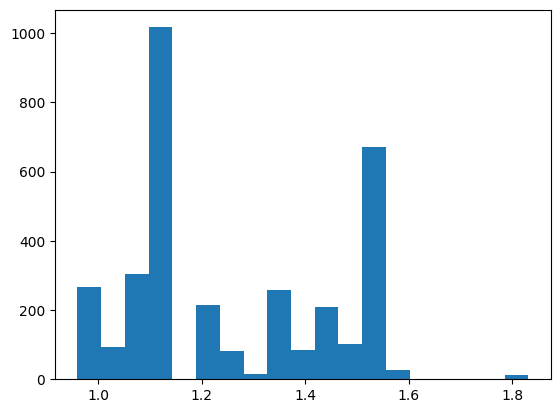

In [86]:
# Print the bonds in the Universe object
print("Bonds:", pdb.bonds)

# Print the bond types in the Universe object
print("Bond Types:", pdb.bonds.types)

# Print the bonds for the atom with index 3
print("Bonds for Atom 3:", pdb.atoms.bonds[3])

# Print all bond values in the Universe object
print("All Bond Values:", list(pdb.atoms.bonds.values()))

# Print the value of the bond with index 2
print("Value of Bond 2:", pdb.bonds[2].value())

# Plotting the distribution of bond lengths using matplotlib
plt.hist(pdb.bonds.values(), bins="auto")

In [91]:
# Select the second residue in the Universe object
r = pdb.residues[1]

# Print the details of the selected residue
print("Selected Residue:", r)

# Print the phi selection of the selected residue
print("Phi Selection:", r.phi_selection())

# Print the psi selection of the selected residue
print("Psi Selection:", r.psi_selection())

# Print the omega selection of the selected residue
print("Omega Selection:", r.omega_selection())

# Print the dihedral angle for the phi selection of the selected residue
phi_dihedral = r.phi_selection().dihedral
print("Phi Dihedral Angle:", phi_dihedral)


Selected Residue: <Residue ARG, 2>
Phi Selection: <AtomGroup [<Atom 18: C of type C of resname MET, resid 1 and segid 4AKE and altLoc >, <Atom 20: N of type N of resname ARG, resid 2 and segid 4AKE and altLoc >, <Atom 22: CA of type C of resname ARG, resid 2 and segid 4AKE and altLoc >, <Atom 42: C of type C of resname ARG, resid 2 and segid 4AKE and altLoc >]>
Psi Selection: <AtomGroup [<Atom 20: N of type N of resname ARG, resid 2 and segid 4AKE and altLoc >, <Atom 22: CA of type C of resname ARG, resid 2 and segid 4AKE and altLoc >, <Atom 42: C of type C of resname ARG, resid 2 and segid 4AKE and altLoc >, <Atom 44: N of type N of resname ILE, resid 3 and segid 4AKE and altLoc >]>
Omega Selection: <AtomGroup [<Atom 22: CA of type C of resname ARG, resid 2 and segid 4AKE and altLoc >, <Atom 42: C of type C of resname ARG, resid 2 and segid 4AKE and altLoc >, <Atom 44: N of type N of resname ILE, resid 3 and segid 4AKE and altLoc >, <Atom 46: CA of type C of resname ILE, resid 3 and s

In [89]:
# Select the alpha carbon (CA) atoms from residues 4, 5, and 6
at1 = pdb.residues[4].atoms.select_atoms('name CA')
at2 = pdb.residues[5].atoms.select_atoms('name CA')
at3 = pdb.residues[6].atoms.select_atoms('name CA')

# Combine the selected atoms into a single AtomGroup
ag = at1 + at2 + at3

# Calculate the angle formed by the three selected atoms
angle_value = ag.angle.value()

# Print the selected atoms and the calculated angle
print("Selected Atoms:")
print("Residue 4 CA:", at1)
print("Residue 5 CA:", at2)
print("Residue 6 CA:", at3)
print("\nCombined AtomGroup:", ag)
print("\nCalculated Angle Value:", angle_value)

Selected Atoms:
Residue 4 CA: <AtomGroup [<Atom 84: CA of type C of resname LEU, resid 5 and segid 4AKE and altLoc >]>
Residue 5 CA: <AtomGroup [<Atom 103: CA of type C of resname LEU, resid 6 and segid 4AKE and altLoc >]>
Residue 6 CA: <AtomGroup [<Atom 122: CA of type C of resname GLY, resid 7 and segid 4AKE and altLoc >]>

Combined AtomGroup: <AtomGroup [<Atom 84: CA of type C of resname LEU, resid 5 and segid 4AKE and altLoc >, <Atom 103: CA of type C of resname LEU, resid 6 and segid 4AKE and altLoc >, <Atom 122: CA of type C of resname GLY, resid 7 and segid 4AKE and altLoc >]>

Calculated Angle Value: 125.1890032501002


In [94]:
# The most useful attribute of our atoms are their coordinates, available in the `positions` attribute of an `AtomGroup`
'''
The positions are returned as a NumPy array, which we can then readily manipulate.
There are some built-in functions based on position data, e.g. `center_of_mass()`, `center_of_geometry()` and `radius_of_gyration()`.
'''

# Get the positions of all atoms in the pdb AtomGroup
pos = pdb.atoms.positions
print("Positions of all atoms:\n", pos)

# Calculate the center of mass of the AtomGroup
com = pdb.atoms.center_of_mass()
print("Center of Mass:", com)

# Calculate the center of geometry of the AtomGroup
cog = pdb.atoms.center_of_geometry()
print("Center of Geometry:", cog)

# Calculate the radius of gyration of the AtomGroup
rog = pdb.atoms.radius_of_gyration()
print("Radius of Gyration:", rog)

# Calculate the bounding sphere of the AtomGroup
bsphere = pdb.atoms.bsphere()
print("Bounding Sphere (radius, center):", bsphere)


Positions of all atoms:
 [[-11.921  26.307  10.41 ]
 [-11.447  26.741   9.595]
 [-12.44   27.042  10.926]
 ...
 [-12.616  28.099  21.258]
 [-13.786  28.568  21.198]
 [-12.417  26.877  21.494]]
Center of Mass: [-3.7312362   9.62160779 14.34819104]
Center of Geometry: [-3.66508082  9.60502842 14.33355791]
Radius of Gyration: 19.55743700724636
Bounding Sphere (radius, center): (36.88213166525083, array([-3.66508082,  9.60502842, 14.33355791]))


#### The `lib.distances` Module

The `lib.distances` module in MDAnalysis is particularly useful for handling particle positions, which are represented as numpy arrays. While numpy is powerful for general array manipulations, `lib.distances` offers specialized functionality for molecular dynamics, especially when dealing with periodic boundary conditions.

Key Features of `lib.distances`:

- **Periodic Boundary Conditions**: Handles calculations involving periodic boundary conditions, which numpy alone cannot manage.
- **Domain-Specific Algorithms**: Provides algorithms tailored for molecular dynamics simulations, enhancing the accuracy and efficiency of distance calculations.

##### Common Use Cases:

1. **Distance Calculations**: Compute distances between atoms or groups of atoms, considering periodic boundaries.
2. **Contact Analysis**: Identify and analyze contacts between atoms or residues within a specified cutoff distance.
3. **Geometric Selections**: Select atoms based on spatial criteria, such as atoms within a certain distance from a reference point.



In [100]:
# Distance array to calculate all pairwise distances between two arrays of coordinates.
'''
The `distance_array` function calculates all pairwise distances between two arrays of coordinates.
This function is useful for calculating distances between atoms or residues in a molecular system.
'''

# Select the first 10 atoms and the next 20 atoms in the Universe object
atom_group_1 = u.atoms[:10]
atom_group_2 = u.atoms[10:30]

# Calculate the pairwise distances between the selected atoms
pairwise_distances = mda_distances.distance_array(atom_group_1.positions, 
                                                  atom_group_2.positions,
                                                  box=u.dimensions)

# Print the sizes of the input atom groups and the shape of the output distance array
print(f'Input atom groups have sizes {len(atom_group_1)} and {len(atom_group_2)}.')
print(f'The output distance array has shape: {pairwise_distances.shape}\n')

# Print the calculated pairwise distances
print("Pairwise Distances:\n", pairwise_distances)

# Calculate the distance between the 4th and 6th atom in the two AtomGroups
print(f'The distance between {atom_group_1[3]} and {atom_group_2[5]} is {pairwise_distances[3, 5]} A')

Input atom groups have sizes 10 and 20.
The output distance array has shape: (10, 20)

Pairwise Distances:
 [[4.18088681 4.14294196 5.04585143 5.32751757 4.7130687  6.30996415
  5.68400283 2.54812542 2.96635031 3.67629133 3.85846855 4.99648446
  4.94565935 5.93783435 6.90992514 6.38235495 5.82786529 5.33756183
  6.9460756  5.57071665]
 [4.91489955 4.85935014 5.98073929 6.23106959 5.54186499 7.18169306
  6.62319949 2.8273095  3.26287418 3.7922078  3.96758782 5.03623467
  4.97678969 5.74742629 6.73735139 6.22207718 5.38776855 4.86114181
  6.45646673 5.02042183]
 [4.17637449 4.53242997 5.03940839 4.97153416 4.23180203 5.9572419
  5.2354988  3.42427919 3.93015825 4.44948799 4.46483858 5.85226664
  5.89520245 6.77510548 7.78459265 7.10265153 6.67269431 6.26081198
  7.7989879  6.24766953]
 [4.76201846 4.45247434 5.1726278  5.66651264 5.21592931 6.70279043
  5.88478524 2.86477004 2.84568316 4.17159323 4.54119591 5.32984121
  5.07396141 6.36955445 7.25278687 6.95744115 6.26345124 5.61743675
  

In [127]:
# Additional distance functions
'''
MDAnalysis provides additional distance functions for calculating distances between atoms or groups of atoms.
These functions include:
- `calc_bonds`: Calculate bond distances between two sets of coordinates.
- `calc_angles`: Calculate angles between three sets of coordinates.
- `calc_dihedrals`: Calculate dihedrals between four sets of coordinates.
'''

'\nMDAnalysis provides additional distance functions for calculating distances between atoms or groups of atoms.\nThese functions include:\n- `calc_bonds`: Calculate bond distances between two sets of coordinates.\n- `calc_angles`: Calculate angles between three sets of coordinates.\n- `calc_dihedrals`: Calculate dihedrals between four sets of coordinates.\n'

In [102]:
# Calculating self_distance_array
'''
The `self_distance_array` function calculates all pairwise distances between the atoms in a single AtomGroup.
This function is useful for calculating distances between all atoms in a molecular system.
'''

# Calculate the self-distance array for the atom group
self_distances = mda_distances.self_distance_array(atom_group_1.positions, box=None)

# Print the size of the input AtomGroup and the shape of the output distance array
print(f'The input AtomGroup has {len(atom_group_1)} atoms.')
print(f'The self-distance array has shape: {self_distances.shape}')


The input AtomGroup has 10 atoms.
The self-distance array has shape: (45,)


In [104]:
# Calculate bond distances between two sets of coordinates
# Using the first 10 atoms and the next 10 atoms in the Universe object

# Get the positions of the first 10 atoms
coords_set_1 = u.atoms[:10].positions

# Get the positions of the next 10 atoms
coords_set_2 = u.atoms[10:20].positions

# Calculate the bond distances between the two sets of coordinates
bond_distances = mda_distances.calc_bonds(coords_set_1, coords_set_2, box=None)

# Print the lengths of the input coordinate sets and the shape of the output distance array
print(f'The input coordinate sets have lengths {len(coords_set_1)} and {len(coords_set_2)}.')
print(f'The output distance array has shape: {bond_distances.shape}\n')

# Print the distance between the first coordinate in each array
print(f'The distance between the first coordinate in each array is: {bond_distances[0]}')

The input coordinate sets have lengths 10 and 10.
The output distance array has shape: (10,)

The distance between the first coordinate in each array is: 4.180886814373797


In [106]:
# Calculating angles and dihedrals

# Select the positions of the first 30 atoms in groups of 10
coords_group1 = u.atoms[:10].positions
coords_group2 = u.atoms[10:20].positions
coords_group3 = u.atoms[20:30].positions

# Calculate the angles between the three groups of coordinates
angles = mda_distances.calc_angles(coords_group1, coords_group2, coords_group3, box=None)

# Print the calculated angles in degrees
print("Calculated Angles (in degrees):")
print(np.rad2deg(angles))

# Select the positions of the next 10 atoms
coords_group4 = u.atoms[30:40].positions

# Calculate the dihedrals between the four groups of coordinates
dihedrals = mda_distances.calc_dihedrals(coords_group1, coords_group2, coords_group3, coords_group4)

# Print the calculated dihedrals in degrees
print("\nCalculated Dihedrals (in degrees):")
print(np.rad2deg(dihedrals))

Calculated Angles (in degrees):
[ 60.1705515   70.44413816  61.74292062  48.97993666  31.49563244
  31.70597945  15.62738421 162.62889398 125.52167306 148.32427929]

Calculated Dihedrals (in degrees):
[ 102.76686509   38.29525973   35.75546799   37.51969166   56.09151362
   41.27865924  113.42304837  139.67473756  -57.370594   -109.57491729]


In [107]:
# Calculating the radius of gyration using `radius_of_gyration()` function
# The `radius_of_gyration()` function calculates the radius of gyration of an AtomGroup.

# Calculate the radius of gyration of the AtomGroup
radius_of_gyration = pdb.atoms.radius_of_gyration()
print("Radius of Gyration:", radius_of_gyration)


Radius of Gyration: 19.55743700724636


In [111]:
"""
Minimum image convention

To account for periodic boundary conditions in distance calculations,
pass the box information as `box=ag.dimensions` to any distance or angle function.

This makes the distance calculation take the minimum image convention into account when calculating distance,
which makes the measured distances equal to the minimum possible between all periodic images of the two coordinates.
"""

# Print the box dimensions of the Universe
print(f'The box dimensions of our Universe are: {pdb.dimensions}')

# Select the protein atoms from the Universe
protein_atoms = pdb.select_atoms('protein')

# Calculate the maximum distance without considering periodic boundaries
max_distance_no_pbc = mda_distances.self_distance_array(protein_atoms.positions).max()
print(f'The maximum distance without periodic boundaries is: {max_distance_no_pbc:.2f} Å')

# Calculate the maximum distance considering periodic boundaries
max_distance_with_pbc = mda_distances.self_distance_array(protein_atoms.positions, box=pdb.dimensions).max()
print(f'The maximum distance with periodic boundaries is: {max_distance_with_pbc:.2f} Å')

The box dimensions of our Universe are: [80.017 80.017 80.017 60.    60.    90.   ]
The maximum distance without periodic boundaries is: 61.74 Å
The maximum distance with periodic boundaries is: 51.13 Å


In [ ]:
# Load the GRO and TRR files from MDanalysis test dataset into a Universe object
universe_gro_trr = mda.Universe(GRO, TRR)

'''
# `capped_distance` and `self_capped_distance`

Only find distances up to a maximum limit. It returns:
- an array of indices
- an array of distances

This is much more efficient when dealing with large (>50,000 atoms) systems.
'''

# Select hydrogen atoms from water molecules (resname SOL) and acceptor atoms (N and O) from the protein
hydrogen_atoms = universe_gro_trr.select_atoms('(resname WAT or resname SOL or resname HOH) and type H')
acceptor_atoms = universe_gro_trr.select_atoms('protein and (type N or type O)')

# Print the number of hydrogen and acceptor atoms
print(f'Number of hydrogen atoms: {len(hydrogen_atoms)}')
print(f'Number of acceptor atoms: {len(acceptor_atoms)}')

# Calculate capped distances between hydrogen and acceptor atoms
indices, distances = mda_distances.capped_distance(hydrogen_atoms.positions, 
                                                   acceptor_atoms.positions, 
                                                   min_cutoff=1.0,
                                                   max_cutoff=4.0,
                                                   box=universe_gro_trr.dimensions)

# Print the number of contacts found and the first three contacts with their distances
print(f'Number of contacts found within 4.0 Å: {len(indices)}')
print(f'First three contacts (indices): {indices[:3]}')
print(f'First three distances: {distances[:3]} Å')

Number of hydrogen atoms: 22168
Number of acceptor atoms: 609
Number of contacts found within 4.0 Å: 2602
First three contacts (indices): [[  1 133]
 [ 36 472]
 [ 37 472]]
First three distances: [3.89182471 1.91282448 3.38900544] Å
